In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dpath = "/content/drive/MyDrive/rbrtatxscripts/"
rpath = f"{dpath}requirements.txt"
!pip install -q -r {rpath}

In [3]:
OUT_DIR = "/content/drive/MyDrive/rbrtftmdlnew"

In [5]:
from checkinfer import *

In [6]:
rbrtatoxiccnfthrvalidator(contextstr="You worst idiot")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/content/checkinfer.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you 

{'contextstr': 'You worst idiot',
 'cnf_intr': '0.553',
 'evallabel': 1,
 'cntthreholdanalysis': True,
 'prediction': 'Toxic'}

In [7]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [ ]:
from helper import *
df = pd.read_csv('/content/toxicity_en.csv')
df = benchmark_rtimeresult(df,colname='text')

/content/checkinfer.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ft_model.load_state_dict(torch.load(binpath, map_location=device))


In [10]:
df['pred'] = df['prediction'].replace('Non-toxic', 'Not Toxic')
df['match'] = df['is_toxic'] == df['pred']

In [12]:
df

,text,is_toxic,eval,contextstr,cnf_intr,evallabel,cntthreholdanalysis,prediction,pred,match
0,"Elon Musk is a piece of shit, greedy capitalist who exploits workers, and offers nothing of real benefit to the world.\n All he’s done is make a name for himself on the backs of other people, using dirty money from his family’s emerald mine they acquired during apartheid.\n I don’t care that he’s autistic. He thinks we should be cured with his company’s AI chip. \n He is not a representation of our community. Don’t celebrate him on this page.",Toxic,"{'contextstr': 'Elon Musk is a piece of shit, greedy capitalist who exploits workers, and offers nothing of real benefit to the world. All he’s done is make a name for himself on the backs of other people, using dirty money from his family’s emerald mine they acquired during apartheid. I don’t care that he’s autistic. He thinks we should be cured with his company’s AI chip. He is not a representation of our community. Don’t celebrate him on this page.', 'cnf_intr': '0.555', 'evallabel': 1, 'cntthreholdanalysis': True, 'prediction': 'Toxic'}","Elon Musk is a piece of shit, greedy capitalist who exploits workers, and offers nothing of real benefit to the world.\n All he’s done is make a name for himself on the backs of other people, using dirty money from his family’s emerald mine they acquired during apartheid.\n I don’t care that he’s autistic. He thinks we should be cured with his company’s AI chip. \n He is not a representation of our community. Don’t celebrate him on this page.",0.555,1,True,Toxic,Toxic,True
1,The senile credit card shrill from Delaware needs to resign!!,Toxic,"{'contextstr': 'The senile credit card shrill from Delaware needs to resign!!', 'cnf_intr': '0.521', 'evallabel': 1, 'cntthreholdanalysis': True, 'prediction': 'Toxic'}",The senile credit card shrill from Delaware needs to resign!!,0.521,1,True,Toxic,Toxic,True
2,"He does that a lot -- makes everyone look good but him...I guess it's also probably the Dems and the Media that force him to compulsively tweet abject bullshit like a lying bitch. They're tricky, them libs.",Toxic,"{'contextstr': 'He does that a lot -- makes everyone look good but him...I guess it's also probably the Dems and the Media that force him to compulsively tweet abject bullshit like a lying bitch. They're tricky, them libs.', 'cnf_intr': '0.557', 'evallabel': 1, 'cntthreholdanalysis': True, 'prediction': 'Toxic'}","He does that a lot -- makes everyone look good but him...I guess it's also probably the Dems and the Media that force him to compulsively tweet abject bullshit like a lying bitch. They're tricky, them libs.",0.557,1,True,Toxic,Toxic,True
3,F*ck Lizzo,Toxic,"{'contextstr': 'F*ck Lizzo', 'cnf_intr': '0.557', 'evallabel': 1, 'cntthreholdanalysis': True, 'prediction': 'Toxic'}",F*ck Lizzo,0.557,1,True,Toxic,Toxic,True
4,Epstein and trump were best buds!!! Pedophiles who play together!!,Toxic,"{'contextstr': 'Epstein and trump were best buds!!! Pedophiles who play together!!', 'cnf_intr': '0.554', 'evallabel': 1, 'cntthreholdanalysis': True, 'prediction': 'Toxic'}",Epstein and trump were best buds!!! Pedophiles who play together!!,0.554,1,True,Toxic,Toxic,True
...,...,...,...,...,...,...,...,...,...,...
995,My maternal abuelita taught me how to make plantain empanadas 🥺 and my paternal abuelita needed me to help her brush her dentures 😌 I love them so much 🥰,Not Toxic,"{'contextstr': 'My maternal abuelita taught me how to make plantain empanadas 🥺 and my paternal abuelita needed me to help her brush her dentures 😌 I love them so much 🥰', 'cnf_intr': '0.304', 'evallabel': 0, 'cntthreholdanalysis': True, 'prediction': 'Non-toxic'}",My maternal abuelita taught me how to make plantain empanadas 🥺 and my paternal abuelita needed me to help her brush her dentures 😌 I love them so much 🥰,0.304,0,True,Non-toxic,Not Toxic,True
996,Funnily enough I was looking online last week and wondering why nobody has opened an eSports/Gaming bar round here.

In [60]:
import importlib
import helper
importlib.reload(helper)

<module 'helper' from '/content/helper.py'>

In [61]:
from helper import *

In [62]:
uncertaindf = df[df['pred'].isin(['Uncertain'])]
len(uncertaindf)

7

In [63]:
filtredf = df[df['pred'].isin(['Toxic', 'Not Toxic'])]

Confusion Matrix:
 [[408  86]
 [ 38 461]]
Confusion Matrix Shape: (2, 2)


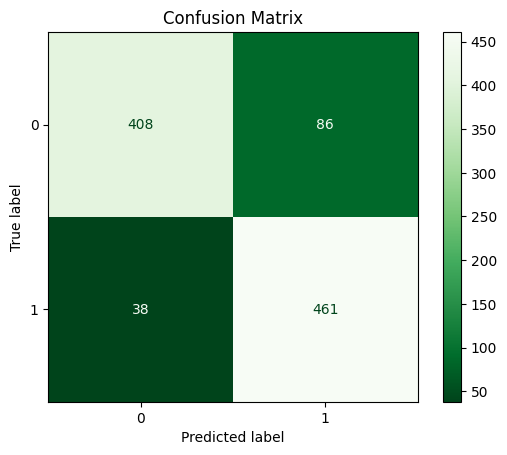

,accuracy,precision,recallscore,f1score,TNegatve,Fpostve,FNegatve,Tpostve
ftrbmdl,0.8751,0.8786,0.8751,0.8748,408,86,38,461


In [64]:
calculate_metrics(df=filtredf,truecol='is_toxic',predcol='pred', modellbl='ftrbmdl')

In [65]:
df.to_csv("baserun_tx_en.csv", index=False)